# Advanced Data Analysis - Week 1 and 2 exercises

This notebook contains additional exercises for the topics addressed in week 1 and 2.

This was the **Assignment 1** of 2022/23.

The topic of the exercises consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).




[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt


## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [86]:
dataFileName = os.path.join( "data", "weather2.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  AG000060390 1950-01-01   162    80    91
1  AG000060390 1950-01-02   129    74   153
2  AG000060390 1950-01-03   138    70     0
3  AG000060390 1950-01-04   163    68     0
4  AG000060390 1950-01-05   172    57     0


In [3]:
stationsFileName = os.path.join( "data", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [4]:
regionsFileName = os.path.join( "data", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [106]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#joining dataDF and stationsDF on id
tempDF = dataDF.set_index("id").join(stationsDF.set_index("id"), how = "inner").reset_index()

#joining tempDF and regionsDF on cid 
weatherDF = tempDF.set_index("cid").join(regionsDF.set_index("cid"), how = "inner").reset_index()

#looking at the dataframe
weatherDF

,cid,id,date,tmax,tmin,prcp,lat,lon,alt,name,region,country
0,AG,AG000060390,1950-01-01,162,80,91,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria
1,AG,AG000060390,1950-01-02,129,74,153,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria
2,AG,AG000060390,1950-01-03,138,70,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria
3,AG,AG000060390,1950-01-04,163,68,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria
4,AG,AG000060390,1950-01-05,172,57,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...
2350888,US,USW00092811,2022-06-26,256,222,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States
2350889,US,USW00092811,2022-06-27,267,239,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States
2350890,US,USW00092811,2022-06-28,272,239,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States
2350891,US,USW00092811,2022-06-29,294,256,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States


In [107]:
# three highest temperatures
weatherDF[["date", "name", "tmax"]].nlargest(3, "tmax")

,date,name,tmax
1206314,1998-08-20,KUWAIT INTERNATIONA,513
1204170,1990-07-25,KUWAIT INTERNATIONA,512
1205317,1995-08-14,KUWAIT INTERNATIONA,510


In [108]:
# three lowest temperatures
weatherDF[["date", "name", "tmin"]].nsmallest(3, "tmin")

,date,name,tmin
258764,1950-01-25,BANFF,-512
258741,1950-01-02,BANFF,-461
279066,1950-01-25,SASKATOON AIRPORT,-461


In [109]:
# maximum precipitation
weatherDF[["date", "name", "prcp"]].nlargest(3, "prcp")

,date,name,prcp
1706892,1978-04-05,JEDDAH (KING ABDUL,7780
1706993,1978-07-15,JEDDAH (KING ABDUL,7780
1706994,1978-07-16,JEDDAH (KING ABDUL,7780


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [110]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
LisbonDF = weatherDF[weatherDF.id == "PO000008535"]

# three highest temperatures
LisbonDF[["date", "name", "tmax"]].nlargest(3, "tmax")

,date,name,tmax
1515468,2018-08-04,LISBOA GEOFISICA,420
1502268,1981-06-13,LISBOA GEOFISICA,415
1505954,1991-07-17,LISBOA GEOFISICA,406


In [111]:
# three lowest temperatures
LisbonDF[["date", "name", "tmin"]].nsmallest(3, "tmin")

,date,name,tmin
1492278,1954-02-05,LISBOA GEOFISICA,-9
1493014,1956-02-11,LISBOA GEOFISICA,-8
1493015,1956-02-12,LISBOA GEOFISICA,-8


In [112]:
# maximum precipitation
LisbonDF[["date", "name", "prcp"]].nlargest(3, "prcp")

,date,name,prcp
1511648,2008-02-18,LISBOA GEOFISICA,1024
1503156,1983-11-18,LISBOA GEOFISICA,955
1508239,1997-10-18,LISBOA GEOFISICA,925


### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [113]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
_1cDF = LisbonDF.copy()
_1cDF["year"] = _1cDF["date"].dt.year

_1cDF[(_1cDF["year"] >= 1970) & (_1cDF.tmax >= 300)].groupby("year").size()

year
1970    26
1971    17
1972     8
1973    22
1974    33
1975    18
1976    25
1977    16
1978    28
1979    20
1980    28
1981    31
1982    20
1983    20
1984    26
1985    26
1986    21
1987    38
1988    22
1989    36
1990    26
1991    43
1992    28
1993    23
1994    15
1995    24
1996    27
1997    21
1998    27
1999    22
2001    19
2002    15
2003    33
2004    28
2005    34
2006    41
2007    22
2008    17
2009    33
2010    41
2011    22
2012    27
2013    37
2014    13
2015    30
2016    46
2017    40
2018    33
2019    28
2021     1
2022    32
dtype: int64

### 1.d) Print information about the top-10 days with the largest temperature difference?


In [114]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
weatherDF["temp_diff"] = weatherDF.tmax - weatherDF.tmin
weatherDF.nlargest(10, "temp_diff")

,cid,id,date,tmax,tmin,prcp,lat,lon,alt,name,region,country,temp_diff
362484,CA,CA008103100,1951-02-07,117,-250,8,46.100,-64.780,12.0,MONCTON,North America,Canada,367
300894,CA,CA006105976,1950-03-04,17,-339,0,45.380,-75.720,79.0,OTTAWA CDA,North America,Canada,356
288881,CA,CA004057120,1976-12-10,22,-328,0,52.167,-106.683,500.0,SASKATOON AIRPORT,North America,Canada,350
378097,CA,CA008103100,1994-01-28,95,-250,103,46.100,-64.780,12.0,MONCTON,North America,Canada,345
1206923,KZ,KZ000035188,1951-02-17,-50,-395,10,51.133,71.367,350.0,ASTANA,Asia,Kazakhstan,345
1287287,MG,MG000044272,1988-02-24,102,-239,0,47.750,96.850,1759.0,ULIASTAI,Asia,Mongolia,341
304093,CA,CA006105976,1958-12-22,17,-322,36,45.380,-75.720,79.0,OTTAWA CDA,North America,Canada,339
370817,CA,CA008103100,1974-01-21,72,-267,38,46.100,-64.780,12.0,MONCTON,North America,Canada,339
304145,CA,CA006105976,1959-02-12,28,-306,0,45.380,-75.720,79.0,OTTAWA CDA,North America,Canada,334
323805,CA,CA006105976,2013-01-18,98,-235,62,45.380,-75.720,79.0,OTTAWA CDA,North America,Canada,333


In [115]:
weatherDF.temp_diff.describe()

count    2.350893e+06
mean     8.863691e+01
std      4.310155e+01
min     -1.590000e+03
25%      5.600000e+01
50%      8.400000e+01
75%      1.160000e+02
max      3.670000e+02
Name: temp_diff, dtype: float64

In [116]:
weatherDF[weatherDF.temp_diff < 0]

,cid,id,date,tmax,tmin,prcp,lat,lon,alt,name,region,country,temp_diff
172564,AU,AU000006306,1958-03-27,0,11,0,47.8000,13.0000,437.0,SALZBURG,Europe,Austria,-11
172565,AU,AU000006306,1958-03-28,0,22,0,47.8000,13.0000,437.0,SALZBURG,Europe,Austria,-22
205215,BE,BE000006447,1978-05-02,96,99,110,50.8000,4.3500,104.0,UCCLE,Europe,Belgium,-3
206538,BE,BE000006447,1981-12-15,-19,-18,0,50.8000,4.3500,104.0,UCCLE,Europe,Belgium,-1
391308,CO,CO000080222,1978-12-16,0,90,0,4.7010,-74.1500,2548.0,BOGOTA/ELDORADO,South/Central America & Carribean,Colombia,-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203231,UK,UK000056225,2020-12-27,19,55,0,51.7700,-1.2700,63.0,OXFORD,Europe,United Kingdom,-36
2203234,UK,UK000056225,2020-12-30,2,5,0,51.7700,-1.2700,63.0,OXFORD,Europe,United Kingdom,-3
2235252,US,USC00224265,1982-05-04,106,117,0,33.9278,-89.0083,83.2,HOUSTON,North America,United States,-11
2235681,US,USC00224265,1983-07-08,133,189,0,33.9278,-89.0083,83.2,HOUSTON,North America,United States,-56


### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [117]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

weatherDF.groupby("id").agg({"tmax": "max", "tmin": "min", "prcp": "max"})

,tmax,tmin,prcp
id,,,
AG000060390,475,-33,1366
AR000087129,456,-85,4630
ASN00009021,467,-13,1320
ASN00040214,412,27,3140
ASN00066037,464,1,2162
...,...,...,...
USC00224265,406,-233,1816
USW00014732,417,-194,1727
USW00023174,433,-11,1422


## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


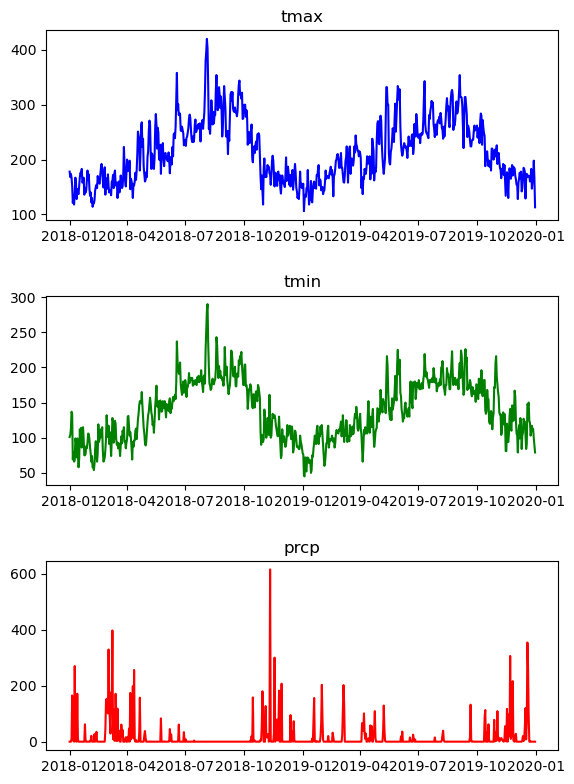

In [118]:
#Solve question here. Briefly justy you solution in the following markdown cell.

myDF = LisbonDF[LisbonDF["date"].dt.year.isin([2018, 2019])]
myDF

fig, axs = plt.subplots(3)
axs[0].plot(myDF.date, myDF.tmax, color = "blue")
axs[0].set_title("tmax")
axs[1].plot(myDF.date, myDF.tmin, color = "green")
axs[1].set_title("tmin")
axs[2].plot(myDF.date, myDF.prcp, color = "red")
axs[2].set_title("prcp")

plt.subplots_adjust(left=0.1,
                    bottom=0.0, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

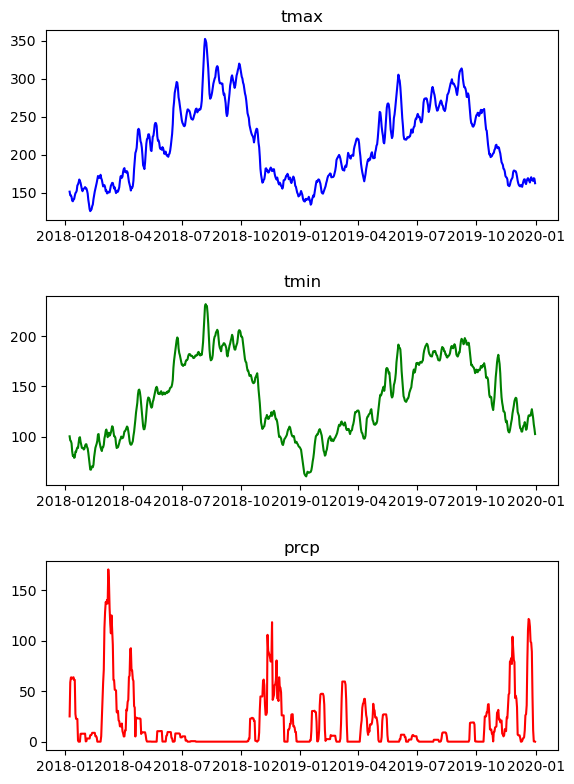

In [120]:
fig, axs = plt.subplots(3)
axs[0].plot(myDF.date, myDF.tmax.rolling(8, center = False).mean(), color = "blue")
axs[0].set_title("tmax")
axs[1].plot(myDF.date, myDF.tmin.rolling(8, center = False).mean(), color = "green")
axs[1].set_title("tmin")
axs[2].plot(myDF.date, myDF.prcp.rolling(8, center = False).mean(), color = "red")
axs[2].set_title("prcp")

plt.subplots_adjust(left=0.1,
                    bottom=0.0, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Rationale:** to be completed

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

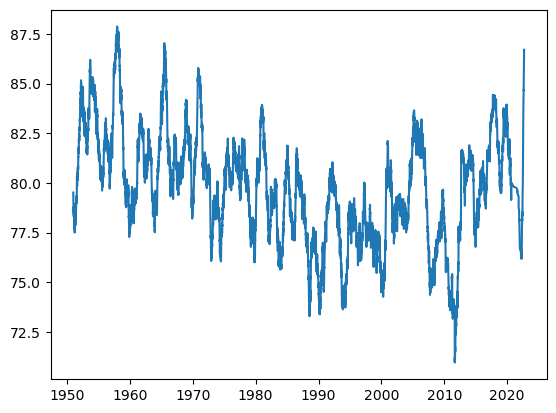

In [69]:
#Solve question here. Briefly justy you solution in the following markdown cell.
_2bDF = weatherDF[weatherDF.id.isin(["ASN00066062", "PO000008535"])]
data = _2bDF.groupby("date")["temp_diff"].mean().to_frame('Avg_temp_diff').reset_index()
data

plt.plot(data.date, data.Avg_temp_diff.rolling(365, center = False).mean())
plt.show()

**Rationale:** to be completed

In [70]:
weatherDF

,cid,id,date,tmax,tmin,prcp,lat,lon,alt,name,region,country,temp_diff
0,AS,ASN00066062,1950-01-01,199,176,61,-33.8607,151.205,39.0,SYDNEY (OBSERVATORY HILL),Australia/South Pacific,Australia,23
1,AS,ASN00066062,1950-01-02,275,171,224,-33.8607,151.205,39.0,SYDNEY (OBSERVATORY HILL),Australia/South Pacific,Australia,104
2,AS,ASN00066062,1950-01-03,233,166,20,-33.8607,151.205,39.0,SYDNEY (OBSERVATORY HILL),Australia/South Pacific,Australia,67
3,AS,ASN00066062,1950-01-04,248,178,0,-33.8607,151.205,39.0,SYDNEY (OBSERVATORY HILL),Australia/South Pacific,Australia,70
4,AS,ASN00066062,1950-01-05,271,182,0,-33.8607,151.205,39.0,SYDNEY (OBSERVATORY HILL),Australia/South Pacific,Australia,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77572,PO,PO000008535,2022-09-10,291,185,0,38.7167,-9.150,77.0,LISBOA GEOFISICA,Europe,Portugal,106
77573,PO,PO000008535,2022-09-11,271,187,0,38.7167,-9.150,77.0,LISBOA GEOFISICA,Europe,Portugal,84
77574,PO,PO000008535,2022-09-13,242,194,61,38.7167,-9.150,77.0,LISBOA GEOFISICA,Europe,Portugal,48
77575,PO,PO000008535,2022-09-14,243,191,71,38.7167,-9.150,77.0,LISBOA GEOFISICA,Europe,Portugal,52


## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [121]:
#Solve question here. Briefly justy you solution in the following markdown cell.
LisbonDF[["tmax", "tmin", "prcp"]].corr()


,tmax,tmin,prcp
tmax,1.000000,0.802520,-0.209511
tmin,0.802520,1.000000,-0.089456
prcp,-0.209511,-0.089456,1.000000


**Present an interpretation of the results here:** to be completed

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [73]:
weatherDF.name.value_counts()

POTSDAM                      26357
SYDNEY (OBSERVATORY HILL)    25783
LISBOA GEOFISICA             25437
Name: name, dtype: int64

In [125]:
potsdam = weatherDF[weatherDF.name == "POTSDAM"]
lisbon = weatherDF[weatherDF.name == "LISBOA GEOFISICA"]
sydney = weatherDF[weatherDF.name == "SYDNEY (OBSERVATORY HILL)"] 

In [126]:
# lisbon & potsdam
lisbon[["date", "tmax"]].set_index("date").corrwith(potsdam[["date", "tmax"]].set_index("date"), drop = True)

tmax    0.716515
dtype: float64

In [127]:
# lisbon & sydney
lisbon[["date", "tmax"]].set_index("date").corrwith(sydney[["date", "tmax"]].set_index("date"), drop = True)

tmax   -0.565191
dtype: float64

In [128]:
# potsdam & sydney
potsdam[["date", "tmax"]].set_index("date").corrwith(sydney[["date", "tmax"]].set_index("date"), drop = True)

tmax   -0.597506
dtype: float64

**Rationale and comments:**

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

In [129]:
weatherDF

,cid,id,date,tmax,tmin,prcp,lat,lon,alt,name,region,country,temp_diff
0,AG,AG000060390,1950-01-01,162,80,91,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria,82
1,AG,AG000060390,1950-01-02,129,74,153,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria,55
2,AG,AG000060390,1950-01-03,138,70,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria,68
3,AG,AG000060390,1950-01-04,163,68,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria,95
4,AG,AG000060390,1950-01-05,172,57,0,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,Africa,Algeria,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350888,US,USW00092811,2022-06-26,256,222,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States,34
2350889,US,USW00092811,2022-06-27,267,239,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States,28
2350890,US,USW00092811,2022-06-28,272,239,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States,33
2350891,US,USW00092811,2022-06-29,294,256,0,25.8064,-80.1336,0.3,MIAMI BEACH,North America,United States,38


### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [131]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

weatherDF.groupby("region").agg({"tmax": "max", "tmin": "min", "prcp": "max"}).reset_index()

,region,tmax,tmin,prcp
0,Africa,498,-85,5001
1,Asia,490,-440,4549
2,Australia/South Pacific,467,-67,3276
3,Europe,442,-381,2000
4,Middle East,513,-139,7780
5,North America,433,-512,2794
6,South/Central America & Carribean,456,-85,4900


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

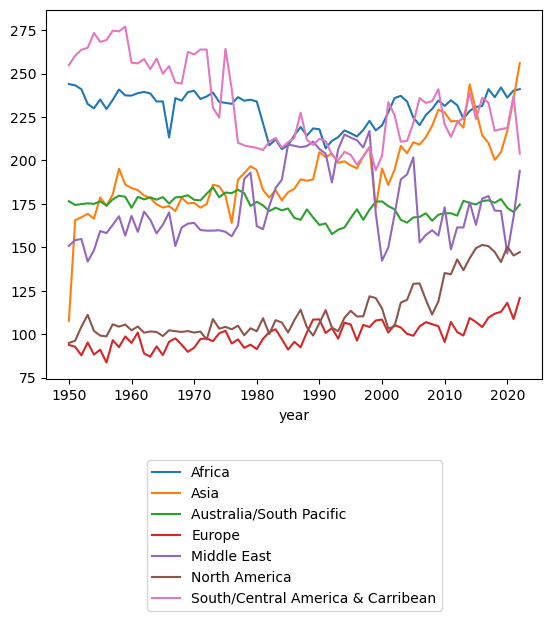

In [156]:
#Solve question here. Briefly justy you solution in the following markdown cell.
fig, axis = plt.subplots()

weatherDF["avg_temp"] = (weatherDF['tmax'] + weatherDF['tmin']) / 2
weatherDF["year"] = weatherDF["date"].dt.year
auxDF = weatherDF[["region", "year", "avg_temp_MA"]].groupby(["region", "year"]).mean().unstack(0)
auxDF.columns = auxDF.columns.get_level_values(1)
auxDF.plot(ax=axis)
axis.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))

**Rationale:** to be completed

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


In [21]:
#Solve question here. Briefly justify you solution in the following markdown cell.


**Rationale:** to be completed